# Supervised Learning: From Data to Deployment

## Project Overview

Welcome to our course in our Practical Machine Learning for Developers series!   This project, Supervised Learning: From Data to Deployment, will walk you through a full machine learning problem example.  The goal of this project is to develop a predictive model that can reasonably identify credit card clients who will default on their payments in the following month.  This dataset has many characteristics present in challenging real-world datasets: correlated features, messy encodings, and an imbalanced target variable.  This project aims to tackle these challenges through comprehensive data cleaning, exploration, and modeling techniques, ending with a showcase of how one would put this model into production.

By the end of this project, participants will have learned from this general example how to create and evaluate a robust predictive model, having gained hands-on experience with the entire machine learning pipeline.  Participants will also learn how to address real-world challenges such as class imbalance and data quality issues, equipping them with practical skills applicable to similar problems in different domains.  This project will not only provide technical proficiency, but also offer insights into the practical aspects of implementing machine learning solutions in a production environment and handling business modeling requirements.

The requirements for all of the sections in this project is some elementary experience in Python and some basic knowledge of math and statistics.  We recommend some rudimentary training in machine learning before starting this training, because this project is far more applied rather than theoretical in nature.  All of the sections in this project will be suitable for participants with a beginner to intermediate level working knowledge in machine learning.

## Data

This project will use a popular dataset that can be found on UCI and Kaggle, which looks at 30,000 credit card clients in Taiwan in 2005.  The following description is taken from UCI and Kaggle.  See an example here: https://www.kaggle.com/code/somaktukai/credit-card-default-model-comparison

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.
This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:

X6 = the repayment status in September, 2005;

X7 = the repayment status in August, 2005; . . .; X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Data Loading & Cleaning

**Learning Objectives:** Be able to load data stored in a CSV format into our workspace, and then transform it into a format that is appropriate for data modeling.  Topics like dropping unnecessary features, one-hot encoding, and reformatting will be covered.  Additionally, participants will see an example of what happens when a model is built without sufficient attention paid to the tidiness of the data.

**Requirements:** Python (in Jupyter or a text editor), minimal Python coding experience.

**Prior recommended training**: Introductory programming.

**Skills and levels**: Beginner to intermediate data scientists, engineers, statisticians, and general ML practitioners.

In this project, as is the case with most real-world datasets, we will load it and find that it is not particularly clean.  The participant has hopefully gotten a sense of this, just from looking at the data description presented in the data overview!  We will start by looking at the basic structure and first few rows of the data and comparing some attributes of it against the provided description.  We must then make some decisions about how to clean it.

In [1]:
import os
import pandas as pd

In [2]:
pd.options.display.max_columns = 999

In [3]:
os.chdir('C:/Users/ribry/Documents/Copieux/')

credit_card = pd.read_csv('data/credit_cards_dataset.csv')

#### Basic structure

In [4]:
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
credit_card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# return the distribution of the target variable
credit_card['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

#### What if we skip this?

You may be thinking at this point about why this is such a big deal, and what happens if we don't do data cleaning or data exploration at all.  We will start with this dataset in its current, naive form, and just throw a naive logistic regression classifier out of the box at it, and see how we perform.  It is ok if you don't know what any of this code is doing!  We will go through every step in this code later on.

C:\Users\ribry\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


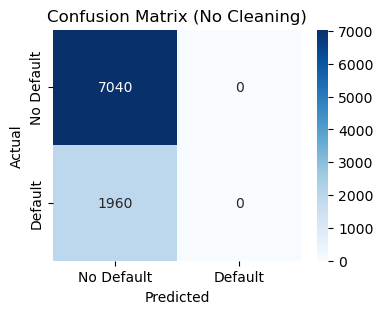

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

features = [col for col in credit_card.columns if col != 'default.payment.next.month']
target = 'default.payment.next.month'

X = credit_card[features]
y = credit_card[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialize logistic regression model
lr_model = LogisticRegression(random_state=42)

# train model
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# evaluate model
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (No Cleaning)')
plt.show()

Essentially, the model is failing to converge and just predicting that no one is going to default.  There are numerous issues that can cause this, and this is not necessarily a rare outcome when we just do not do any work upfront to transform the data into an appropriate format.  Obviously, such a model is completely useless.  However, we will work throughout this project to make something much more useful.

#### Transforming the data

We return to thinking about our dataset.  We don't need the 'ID' variable for anything here.  Similarly, the coding of the SEX, EDUCATION, and MARRIAGE variables are difficult to work with and difficult to remember.  We are best served by converting these via one-hot encoding.   This is a process where each different level of the feature gets its own column.  This will make these features significantly easier to understand, and will transform the data into a more appropriate format for once we are ready to create models.

We note in the marriage and education variables that there is the appearance of the code 0, for which no information is provided in the description.  It is impossible to tell for sure what these are, though they might be hidden missing data.

In [9]:
# drop the unnecessary ID column
credit_card = credit_card.drop('ID', axis=1)

In [10]:
# define the label mappings
sex_mapping = {1: 'Male', 2: 'Female'}
education_mapping = {1: 'Graduate_School', 2: 'University', 3: 'High_School', 4: 'Others'}
marriage_mapping = {1: 'Married', 2: 'Single', 3: 'Others'}

# apply mappings
credit_card['SEX'] = credit_card['SEX'].map(sex_mapping)
credit_card['EDUCATION'] = credit_card['EDUCATION'].map(education_mapping)
credit_card['MARRIAGE'] = credit_card['MARRIAGE'].map(marriage_mapping)

In [11]:
# one hot encode categorical variables
credit_card = pd.get_dummies(
    credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], prefix=['SEX', 'EDU', 'MARRIAGE']
)

In [12]:
# now re-run the info method
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   AGE                         30000 non-null  int64  
 2   PAY_0                       30000 non-null  int64  
 3   PAY_2                       30000 non-null  int64  
 4   PAY_3                       30000 non-null  int64  
 5   PAY_4                       30000 non-null  int64  
 6   PAY_5                       30000 non-null  int64  
 7   PAY_6                       30000 non-null  int64  
 8   BILL_AMT1                   30000 non-null  float64
 9   BILL_AMT2                   30000 non-null  float64
 10  BILL_AMT3                   30000 non-null  float64
 11  BILL_AMT4                   30000 non-null  float64
 12  BILL_AMT5                   30000 non-null  float64
 13  BILL_AMT6                   300

Notice that in our data, we have a combination of ints, floats, and booleans.   The booleans will not return summaries when we call the `describe()` method.  For this reason and for modeling purposes later, we want to convert these new features into ints.  Notice that the bill and payment amount features are floats, because these features retain decimals.  In order to retain as much information as possible, we would like to keep these as floats and only convert these new boolean features into ints.

In [13]:
# identify the variables we want to convert
one_hot_columns = [col for col in credit_card.columns if col.startswith(('SEX_', 'EDU_', 'MARRIAGE_'))]
credit_card[one_hot_columns] = credit_card[one_hot_columns].astype(int)

In [14]:
# inspect the info again
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   AGE                         30000 non-null  int64  
 2   PAY_0                       30000 non-null  int64  
 3   PAY_2                       30000 non-null  int64  
 4   PAY_3                       30000 non-null  int64  
 5   PAY_4                       30000 non-null  int64  
 6   PAY_5                       30000 non-null  int64  
 7   PAY_6                       30000 non-null  int64  
 8   BILL_AMT1                   30000 non-null  float64
 9   BILL_AMT2                   30000 non-null  float64
 10  BILL_AMT3                   30000 non-null  float64
 11  BILL_AMT4                   30000 non-null  float64
 12  BILL_AMT5                   30000 non-null  float64
 13  BILL_AMT6                   300

In [15]:
# now we can use the describe method
credit_card.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_Female,SEX_Male,EDU_Graduate_School,EDU_High_School,EDU_Others,EDU_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.603733,0.396267,0.352833,0.163900,0.004100,0.467667,0.455300,0.010767,0.532133
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.489129,0.489129,0.477859,0.370191,0.063901,0.498962,0.498006,0.103204,0.498975
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Cleaning problematic variables

We now must turn our attention to the PAY_0 ... PAY_6 variables.  There are a few immediate problems to note here that become apparent when we compare the data to the descriptions provided in the UCI website.  First and foremost, there is a gap in the variables as we jump from PAY_0 to PAY_2.  Also, the scale seems to go from {-2 : 8}, where the provided description suggests the range should be from {-1 : 9}.  Therefore, we must make some assumptions.  We will rename from 1 to 6 and assume that the encoded data is incorrect and needs to be adjusted by 1.

In [16]:
# rename the PAY_0 column
credit_card = (
    credit_card
    .rename(columns={'PAY_0': 'PAY_1'})
)

# change the scale
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# increase +1
credit_card[pay_cols] = credit_card[pay_cols] + 1

In [17]:
# these features are technically more similar to categories
# this will help us visualize later - refactor

category_order = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for col in pay_cols:
    credit_card[col] = pd.Categorical(credit_card[col], categories=category_order, ordered=True)

## Data Exploration

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

**Learning Objectives:** See some ways that variables in a dataset can be inspected prior to the machine learning model creation process.  In particular, we will see: value counting of categorical variables, plotting distributions of continuous variables, and addressing multivariate analyses like pairwise distributions and correlations.  Participants should be able to develop some intuition into what questions to ask and things to check prior to building machine learning models in real world projects with similarly (or even worse) messy data.

**Requirements:** Python (in Jupyter or a text editor), minimal Python coding experience preferably with exposure to Matplotlib and/or Seaborn.

**Prior recommended training**: Introductory programming, statistics, data visualization.

**Skills and levels**: Beginner to intermediate data scientists, engineers, statisticians, and general ML practitioners.

The cleaning process has already enabled us to explore this data to some extent.  In particular, the `info()` method provided us with counts of non-missing values and datatypes.   The `describe()` method also provides us some helpful descriptive statistics.  However, we would like to take this a step further to understand our data.  We can drill a little bit deeper into the univariate distributions of our data.   In particular, we would also like to understand the multicollinearity between our features, and the relationships between our continuous and categorical features and the response variable.  Remember - we have already seen the adverse effect of _not_ paying sufficient attention to our data prior to building a machine learning model!

#### Univariate summaries

Let's start with the payment variables, which we have since converted into categories.  We run the value counts of these and we find that it's pretty rare to have a payment delay beyond 5 months, relatively speaking.  For some of the earlier pay variables, it's also rare to have a payment delay of exactly 2 months.

In [19]:
(
    credit_card['PAY_1'].value_counts(),
    credit_card['PAY_2'].value_counts(),
    credit_card['PAY_3'].value_counts(),
    credit_card['PAY_4'].value_counts(),
    credit_card['PAY_5'].value_counts(),
    credit_card['PAY_6'].value_counts()
)

(PAY_1
 1     14737
 0      5686
 2      3688
 -1     2759
 3      2667
 4       322
 5        76
 6        26
 9        19
 7        11
 8         9
 Name: count, dtype: int64,
 PAY_2
 1     15730
 0      6050
 3      3927
 -1     3782
 4       326
 5        99
 2        28
 6        25
 8        20
 7        12
 9         1
 Name: count, dtype: int64,
 PAY_3
 1     15764
 0      5938
 -1     4085
 3      3819
 4       240
 5        76
 8        27
 7        23
 6        21
 2         4
 9         3
 Name: count, dtype: int64,
 PAY_4
 1     16455
 0      5687
 -1     4348
 3      3159
 4       180
 5        69
 8        58
 6        35
 7         5
 2         2
 9         2
 Name: count, dtype: int64,
 PAY_5
 1     16947
 0      5539
 -1     4546
 3      2626
 4       178
 5        84
 8        58
 6        17
 7         4
 9         1
 2         0
 Name: count, dtype: int64,
 PAY_6
 1     16286
 0      5740
 -1     4895
 3      2766
 4       184
 5        49
 8        46
 7        19

In [20]:
# list of some of these columns by type
bill_amt_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
sex_columns = ['SEX_Female', 'SEX_Male']
edu_columns = ['EDU_Graduate_School', 'EDU_High_School', 'EDU_Others', 'EDU_University']
marriage_columns = ['MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single']

We make subplots with histograms of some of the continuous features next.  It is very common to see data like these in the real world - the distribution is extremely right skewed, where there are outliers pulling the distribution strongly on the right tail.  It is common to deal with this during the modeling processing by standardizing; we will see this later.

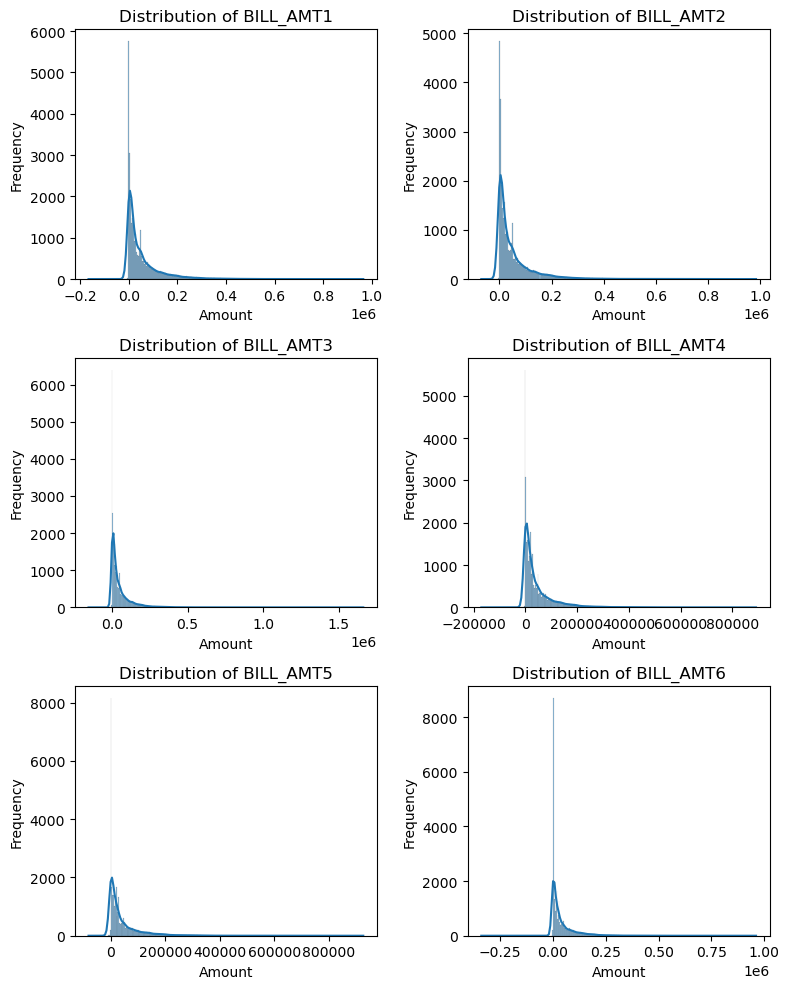

In [21]:
# subplots for bill amount features

plt.figure(figsize=(8, 10))
for i, column in enumerate(bill_amt_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(credit_card[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

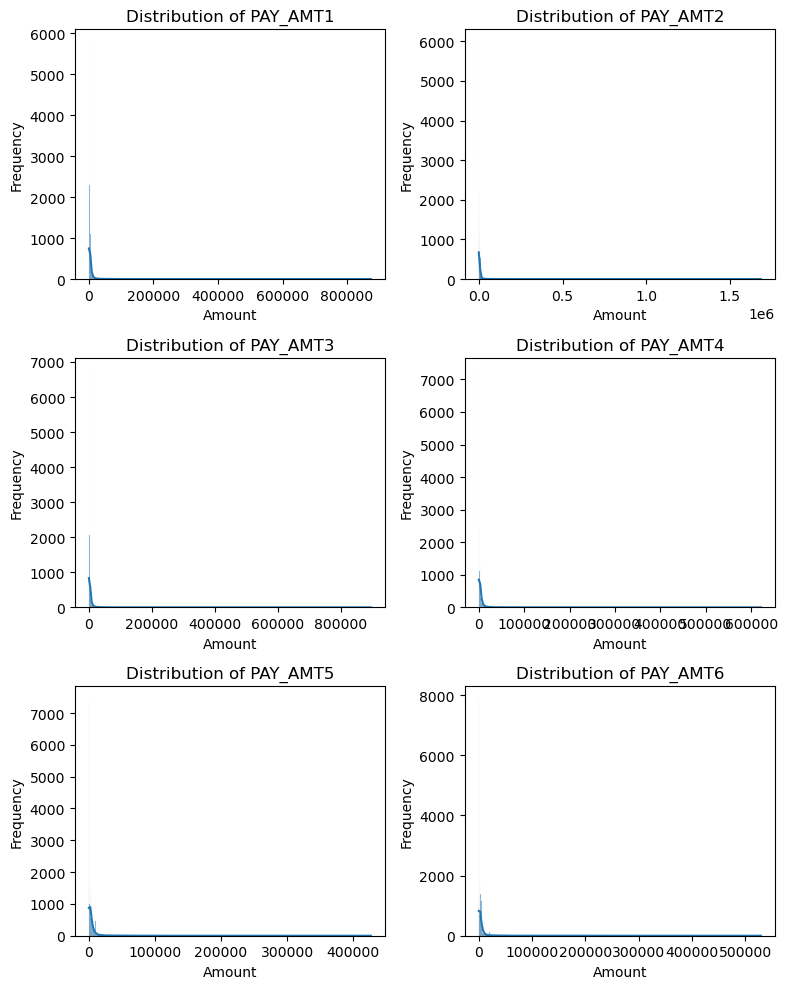

In [22]:
# subplots for payment amount features

plt.figure(figsize=(8, 10))

for i, column in enumerate(pay_amt_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(credit_card[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Multivariate summaries

We start by visualizing the correlation between some of our features.  A reasonable prior is to assume that there will be some strong multicollinearity here - one would think that if you have a payment delay last month, you are more likely to have a payment delay in the current month.

In [23]:
continuous_vars = ['LIMIT_BAL', 'AGE'] + bill_amt_columns + pay_amt_columns
print(continuous_vars)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [24]:
# compute a correlation matrix
corr_matrix = credit_card[continuous_vars].corr()
corr_matrix

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


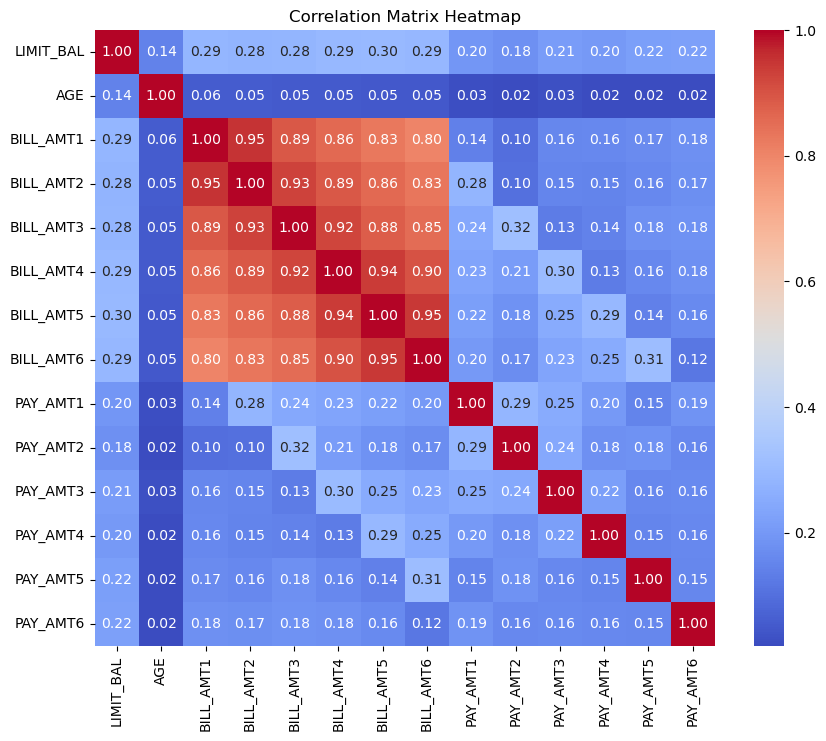

In [25]:
# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Next, let's inspect the relationship between these variables and the response.  We would like to see if these are differences in distributions for levels of the response; if so, these hint to these being particularly useful features when we go to create models.  Boxplots or violin plots are helpful tools for this type of analysis.

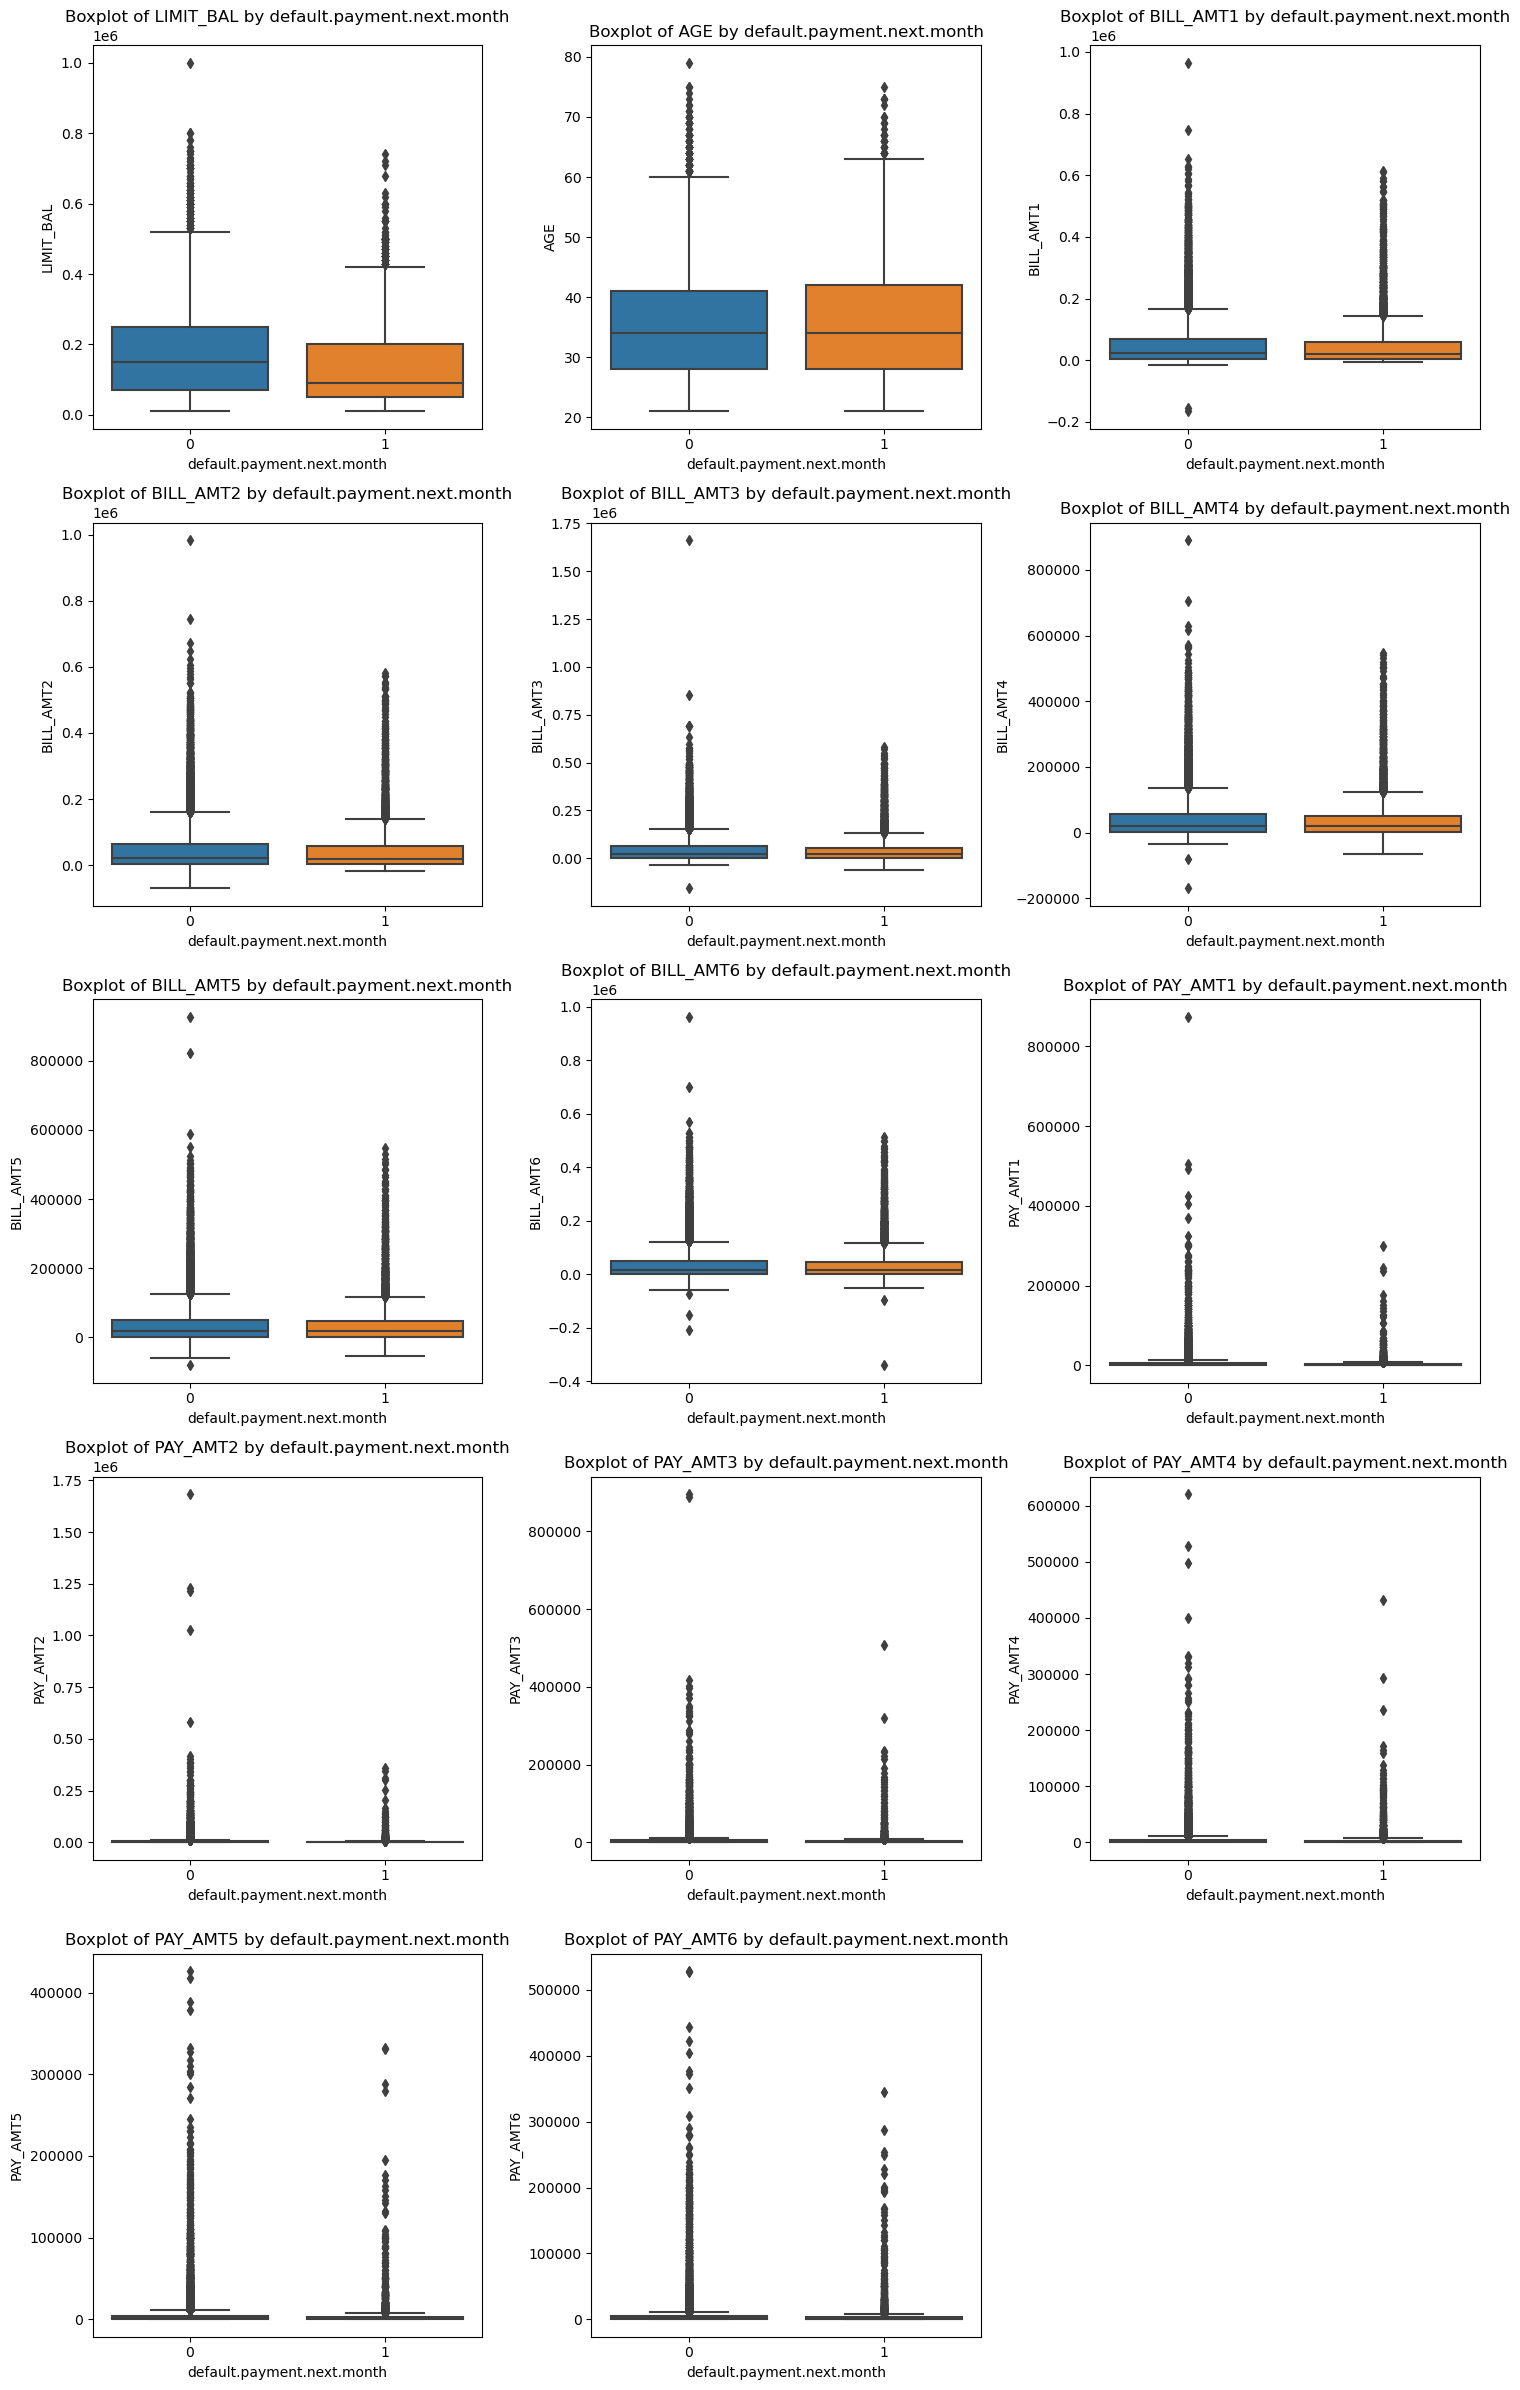

In [26]:
response_var = 'default.payment.next.month'

# create boxplots for each continuous variable
plt.figure(figsize=(15, 24))

for i, column in enumerate(continuous_vars, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=response_var, y=column, data=credit_card)
    plt.title(f'Boxplot of {column} by {response_var}')
    plt.xlabel(response_var)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

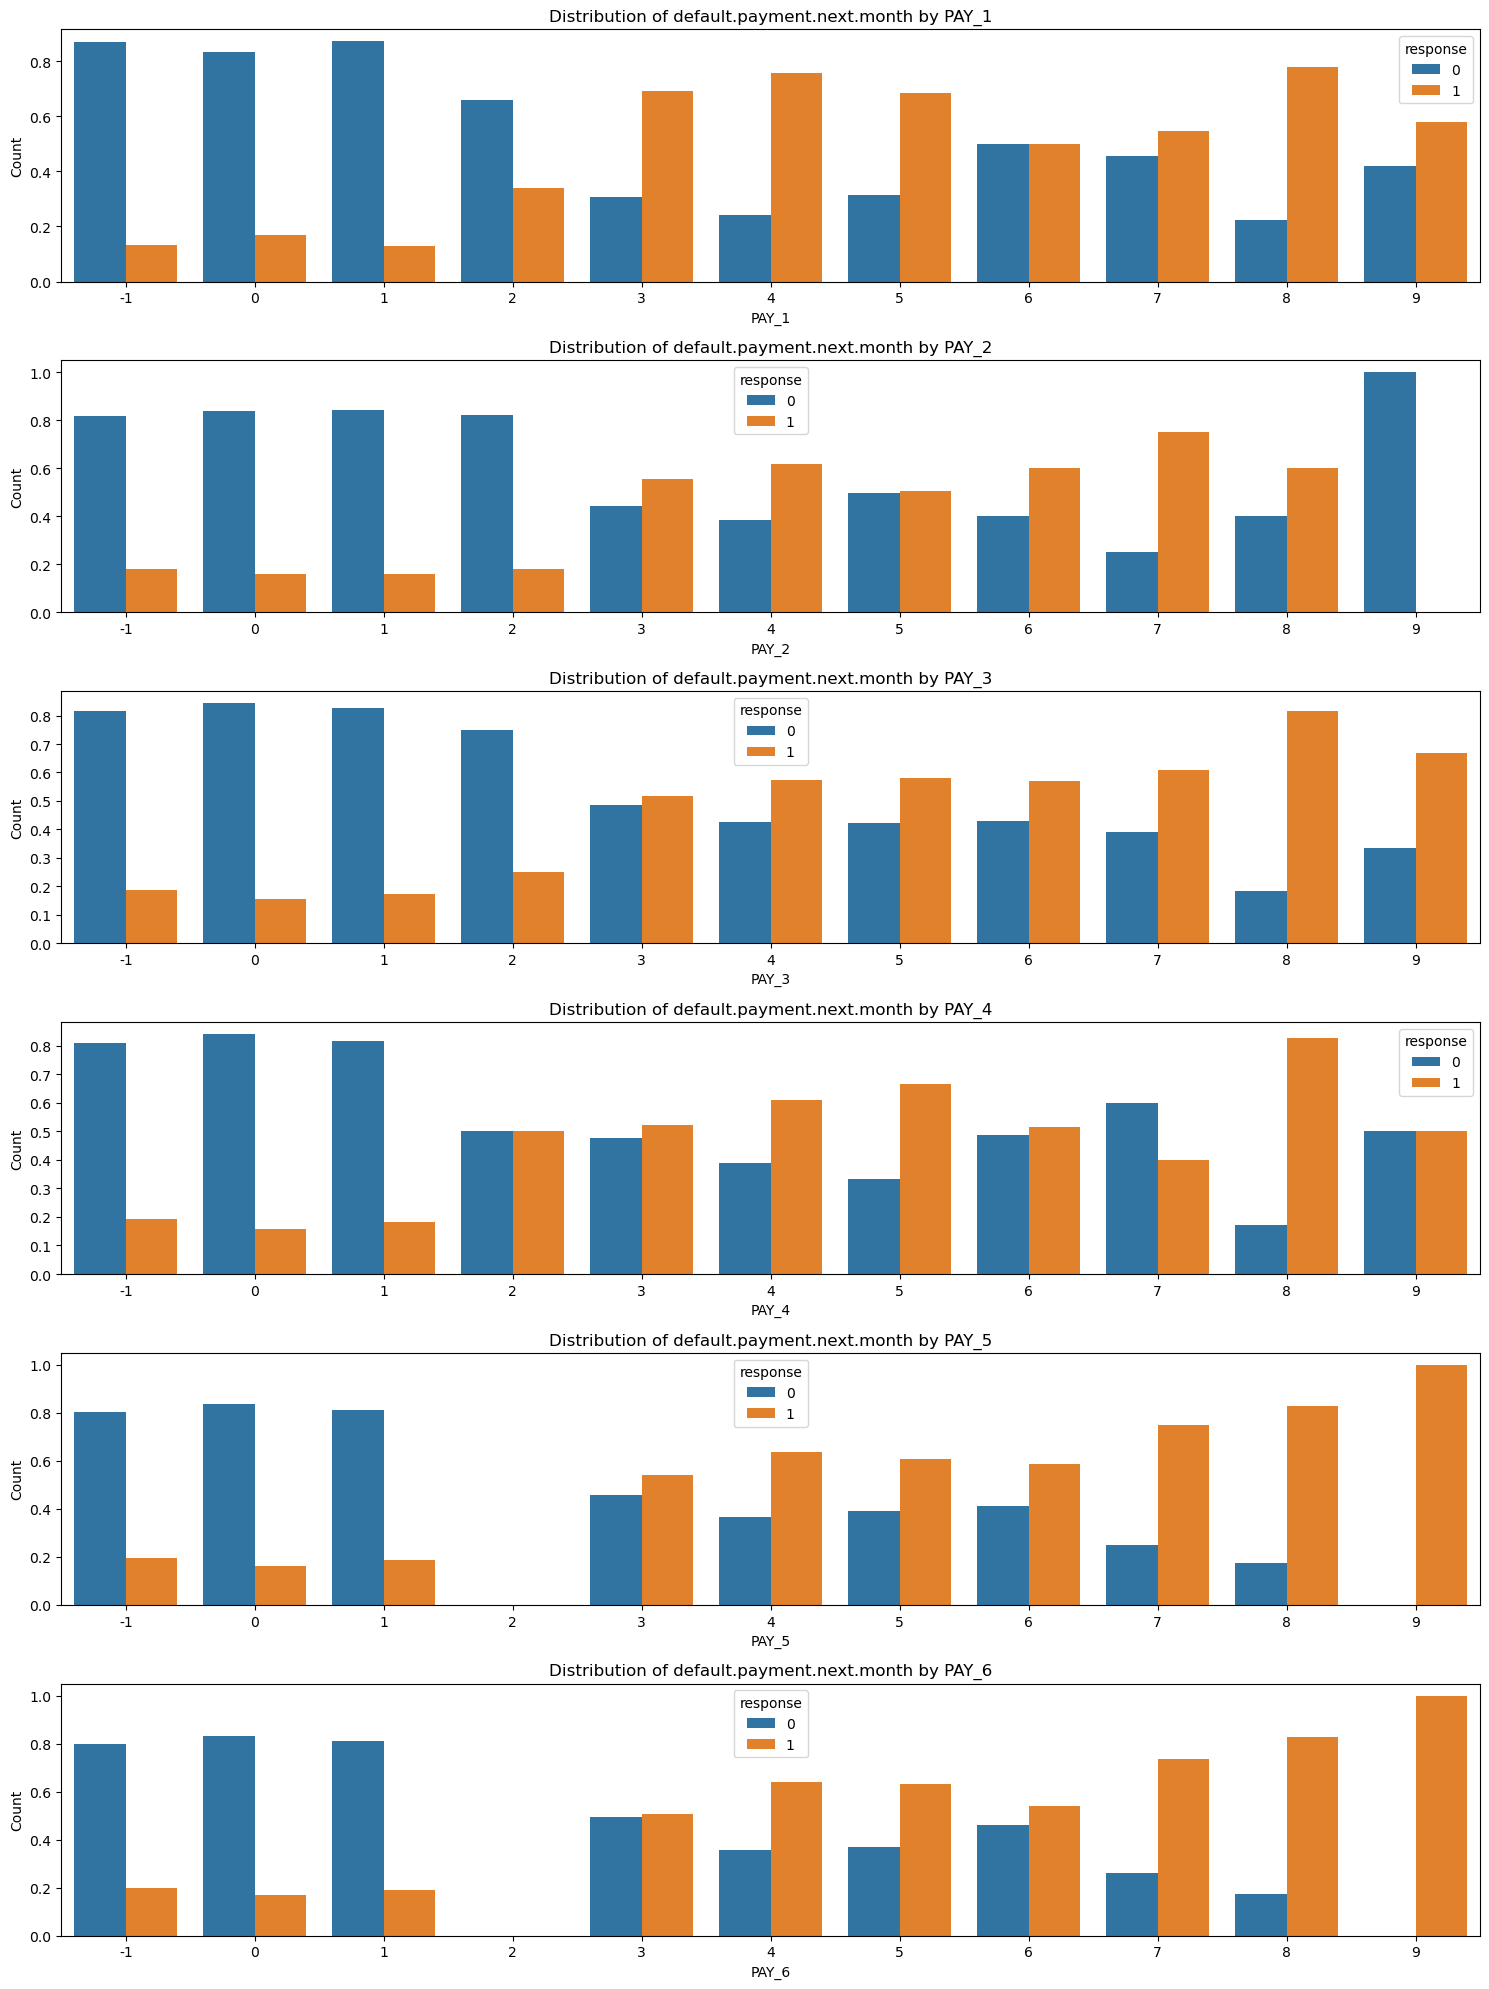

In [27]:
# create count plots for each categorical variable by response variable
# we have to convert to proportions because the relative difference between classes will cause skew

plt.figure(figsize=(15, 20))

for i, column in enumerate(pay_cols, 1):

    # calculate proportions
    proportions = (
        credit_card
        .groupby([column, response_var])
        .size()
        .unstack()
        .fillna(0)
    )
    # normalize to proportions
    proportions = (
        proportions
        .div(proportions.sum(axis=1), axis=0)
    )

    # reset index to plot using seaborn
    proportions = proportions.reset_index()
    proportions = pd.melt(
        proportions, id_vars=[column], value_vars=[0, 1], var_name='response', value_name='proportion'
    )

    plt.subplot(len(pay_cols), 1, i)
    sns.barplot(x=column, y='proportion', hue='response', data=proportions)
    plt.title(f'Distribution of {response_var} by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [28]:
categorical_cols = sex_columns + edu_columns + marriage_columns

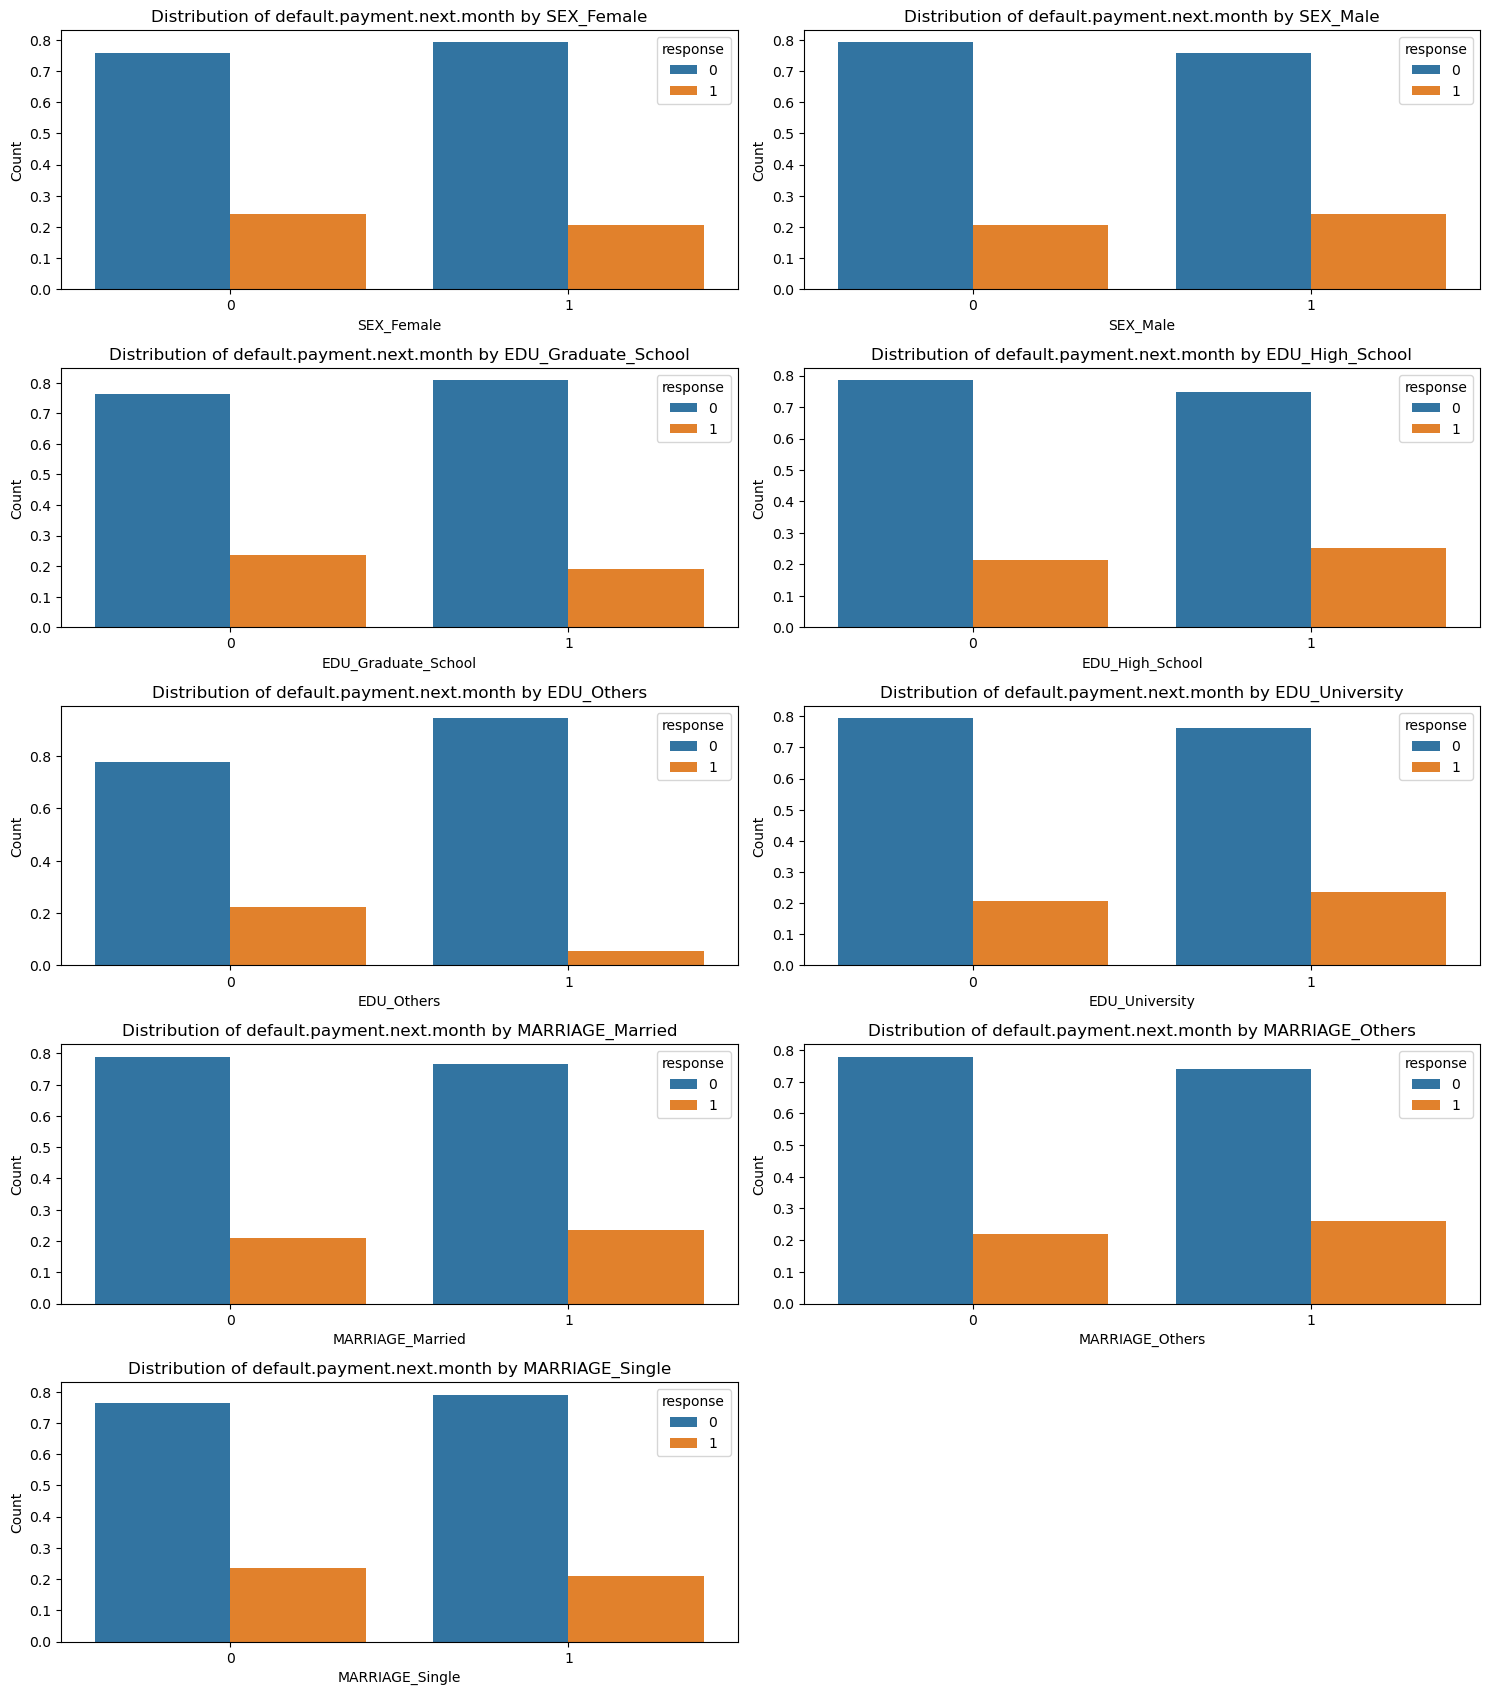

In [29]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_cols, 1):

    # calculate proportions
    proportions = (
        credit_card
        .groupby([column, response_var])
        .size()
        .unstack()
        .fillna(0)
    )
    # normalize to proportions
    proportions = (
        proportions
        .div(proportions.sum(axis=1), axis=0)
    )

    # reset index to plot using seaborn
    proportions = proportions.reset_index()
    proportions = pd.melt(
        proportions, id_vars=[column], value_vars=[0, 1], var_name='response', value_name='proportion'
    )

    plt.subplot(6, 2, i)
    sns.barplot(x=column, y='proportion', hue='response', data=proportions)
    plt.title(f'Distribution of {response_var} by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

It is very noteworthy and unsurprising that the subjects that had default payments in the next month tended to have large payment delays in previous months.  We can see these `PAY_` columns will be incredibly important to us when we go to create machine learning models!

Based on what we see from the value counts as well as from this piece above, we will condense 1 & 2 into one category, and anything above 5 into one category.

In [30]:
for column in pay_cols:
    # use integer codes
    credit_card[column] = credit_card[column].cat.codes - 1

    # condense 5-9 into one category (5)
    credit_card[column] = credit_card[column].apply(lambda x: 5 if x >= 5 else x)

    # condense values 1 & 2 for PAY_2 through PAY_6
    if column not in ['PAY_1']:
        credit_card[column] = credit_card[column].apply(lambda x: 1 if x in [1, 2] else x)

    # convert back to categorical
    for column in pay_cols:
        credit_card[column] = credit_card[column].astype('category')

In [31]:
(
    credit_card['PAY_1'].value_counts(),
    credit_card['PAY_2'].value_counts(),
)

(PAY_1
 1     14737
 0      5686
 2      3688
 -1     2759
 3      2667
 4       322
 5       141
 Name: count, dtype: int64,
 PAY_2
 1     15758
 0      6050
 3      3927
 -1     3782
 4       326
 5       157
 Name: count, dtype: int64)

Lastly, let's drop some of these features that we don't suspect to be adding much.  There instances of that would be the BILL_AMT features after BILL_AMT1 as well as `EDU_Others`, because we are not as concerned about improving our ability to predict the majority class.

In [32]:
credit_card = credit_card.drop(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'EDU_Others'], axis=1)

## Model Training

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Learning Objectives:** Be able to create preliminary machine learning models out of the box.  In particular, participants will see how to implement logistic regression, KNN, decision trees, random forests, and XGBoost, and create basic confusion matrices to see their performance.

**Requirements:** Python (in Jupyter or a text editor), minimal Python coding experience preferably with exposure to Scikit-Learn.

**Prior recommended training**: Introductory programming, statistics, and machine learning.

**Skills and levels**: Beginner to intermediate data scientists, engineers, statisticians, and general ML practitioners.

We are ready to fit some preliminary machine learning models.  Our data may not be yet in perfect shape - for instance we still do have the issue of outliers and right skew with many of our continuous variables, but we will come back to that issue.  It is common to start with a simpler logistic regression model first.   While this will almost certainly not be the best performing model, it provides a reasonable baseline for how well we can predict the outcome class.

Before we start this process, we must separate our data into a training and a test set (optionally, we may include a validation set as well).  It is common to split these data in something like a 0.7-0.3 or 0.8-0.2 proportion (or with a validation set, maybe a 0.6-0.2-0.2 or 0.7-0.15-0.15 split).  The purpose of this is to evaluate how well the model will generalize to unseen data.  The training set is used to train the model, while the test set will assess its performance on new, unseen data.

It should be noted that operations should be performed on the two separately, whenever possible.  You will note in this notebook so far we have applied many operations such as condensing categories, refactoring labels, and one-hot encoding.  This is primarily to illustrate the need for these operations for exploratory purposes; for a model that is going to production we note that new, live data will look more like the source data rather than processed data.  We will standardize variables in our test and training sets separately here so that we preserve the model's ability to generalize to new unseen data; if we standardize all the data together, the test set can inadvertently influence the scaling parameters.  To reiterate, as many operations as possible should be performed on these two datasets __separately__.

In [34]:
# separate the X from the y
features = [col for col in credit_card.columns if col != 'default.payment.next.month']
target = 'default.payment.next.month'

X = credit_card[features]
y = credit_card[target]

In [35]:
# split 70% of data into training and 30% into testing
# fix a random state to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# apply standardization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic regression baseline

In [37]:
# fit a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

We pause for a moment here to think about what our objective is.  Here, is to build a classifier to predict whether a credit card user will default on their payments in the next month, with the highest level of accuracy possible (we will discuss in greater detail in the following section how to evaluate accuracy, exactly).  Note that our goal here is *predictive*, rather than *inference*, or understanding exactly which factors influence the response or demonstrating some sort of causal relationship between any of the X's and the y. 

In [38]:
# predict on the test set
y_pred = model.predict(X_test_scaled)

In [39]:
# look at the distribution of the y_pred
y_pred_dist = pd.Series(y_pred).value_counts(normalize=True).sort_index()
y_pred_dist

0    0.922333
1    0.077667
Name: proportion, dtype: float64

This is a very common issue when one has imbalanced data i.e. 80% of the data belonging to one class.  The predictions can often be even more imbalanced - for example we see 92% of the predictions here belonging to the negative class.  We will address ways of solving this in the later section on Model Tuning.  See the distributions of the test and training responses.  Then, we're going to visualize a confusion matrix to briefly see how this model performed.

In [40]:
y_train.value_counts(), y_test.value_counts()

(default.payment.next.month
 0    16324
 1     4676
 Name: count, dtype: int64,
 default.payment.next.month
 0    7040
 1    1960
 Name: count, dtype: int64)

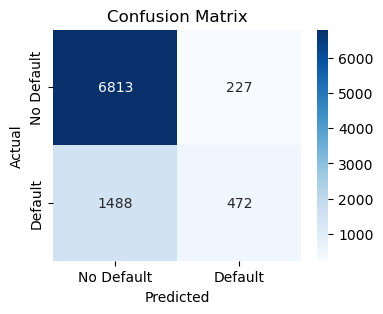

In [41]:
# compute confusion matri
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In our next sub-section on model evaluation, we will discuss further how to think about this model's performance.  However, it is worth discussing how to read this confusion matrix.  Note on the y-axis we have actual counts, and on the x-axis we have the classifier's predictions.  For example, we have 6813 cases that were no defaults that the model accurately classified; there were 472 defaults that the model also accurately classified.  However, it made mistakes as well.  There were 1488 cases that defaulted, that the model failed to predict.  Additionally, there were 227 cases that were not default, that the model wrongly classified as defaulting.

Whew!  But this at least establishes some sort of baseline for us.  Of course, logistic regression is just the starting point, and there are plenty of machine learning algorithms we can try for their predictive capabilities and ability to detect more than purely linear relationships between features and the response.  Here are a few examples:

**KNN**: Short for 'K-Nearest Neighbors', this is a simple and popular algorithm that classifies a data point based on the majority class among its 'k' nearest neighbors, where 'k' is a hyperparameter we pass upfront.

**Decision Trees**: These are structures where each internal node represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents a class label.  These are very intuitive but they tend to overfit and not have the greatest performance.

**Random Forests**: These correct for the overfitting and performance issues of decision trees by ensembling the results of multiple decision trees and combining their predictions to improve robustness and accuracy.  These train trees on random subsets of the data and features, and the trees are allowed to "vote" (this process is known as 'bagging').

**XGBoost**: This is similar to the previous ensemble approach but uses a different process, known as 'boosting'.  Trees are built in a sequential manner where each tree corrects the errors of the previous one, in particular adjusting its weights for the observations that were misclassified.

Let's train all of the above here!

#### KNN

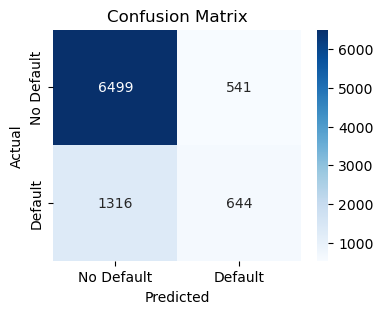

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # arbitrary choice of k

# train model
knn.fit(X_train_scaled, y_train)

# make predictions
y_pred_knn = knn.predict(X_test_scaled)

# evaluate model
conf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

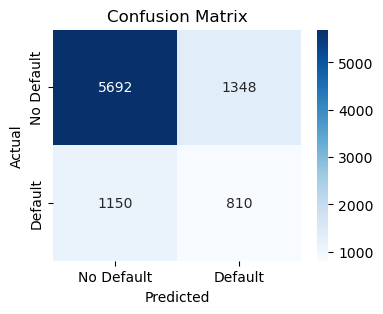

In [43]:
from sklearn.tree import DecisionTreeClassifier

# initialize decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# train model
decision_tree.fit(X_train_scaled, y_train)

# make predictions
y_pred_dt = decision_tree.predict(X_test_scaled)

# evaluate model
conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

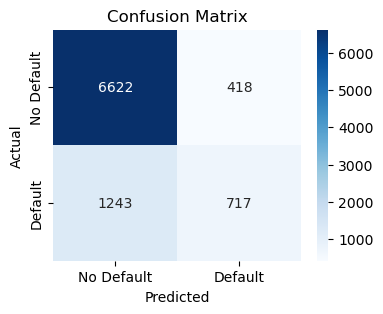

In [44]:
from sklearn.ensemble import RandomForestClassifier

# initialize random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# train model
random_forest.fit(X_train_scaled, y_train)

# make predictions
y_pred_rf = random_forest.predict(X_test_scaled)

# evaluate model
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

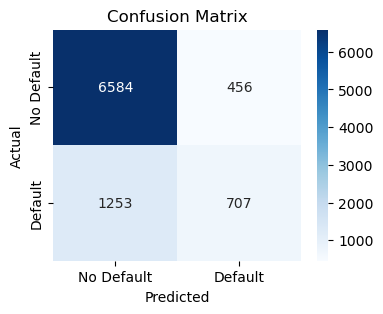

In [45]:
import xgboost
from xgboost import XGBClassifier

# initialize xgboost model
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# train model
xgb_model.fit(X_train_scaled, y_train)

# make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# evaluate model
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We conclude this section here but would like to point out to participants that there are far more options for machine learning methods than the ones presented here.  The focus in remaining sections of this project will be on evaluating and comparing these models, tuning them, and putting a model of choice into production, rather than a theoretical discussion on these or any other machine learning algorithms.  Examples of other possible classifiers include: Naive Bayes, support vector machines (SVM), CatBoost, AdaBoost, logistic regression with regularization (lasso regression, ridge regression, or elastic net), and neural networks.

## Model Evaluation

In [46]:
from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)

**Learning Objectives:** Understand all the metrics used to assess the performance of a machine learning classifier.  Participants should be able to develop intuition into when one metric is more important than another, the trade-offs between different metrics, and how to choose the metrics of the greatest business interest.

**Requirements:** Python (in Jupyter or a text editor), minimal Python coding experience preferably with exposure to Scikit-Learn.

**Prior recommended training**: Introductory programming, statistics, and machine learning.

**Skills and levels**: Beginner to intermediate data scientists, engineers, statisticians, and general ML practitioners.

We will now begin a discussion on how to evaluate the quality of a machine learning model, with particular focus on classifiers like the one we have created here.  We remind participants that, in this particular project, we are not covering a supervised learning model on a dataset featuring a continuous response.

In this scenario, it is very common to use RMSE (Root Mean Squared Error) as the measure of accuracy - this is simply equal to the square root of the sum of squared differences between the actual values and the predicted values.  There are several adjustments possible to this, but it is by far the most common loss function when we work with continuous data.  Obviously, this is not an option when we are predicting classes.  There are many different metrics we need to think about, and the metric of choice depends on the goal of the project.

**Accuracy**: The proportion of correctly classified instances out of the total instances.

**Sensitivity/Recall**: The proportion of true positives correctly identified out of total actual positives
    - e.g. of the cases that defaulted, how many did we correctly predict?

**Specificity**: The proportion of true negatives correctly identified out of total actual negatives
    - e.g. of the cases that did not default, how many did we correctly predict to not default?

**Precision**: The proportion of predicted positives that were actually true positives
    - e.g. of the instances when the model predicted a default, how often was that actually a default?

**F1 Score**: The harmonic mean of precision and recall

There is a lot to unpack here.  But let's begin by calculating these for our XGBoost classifier.

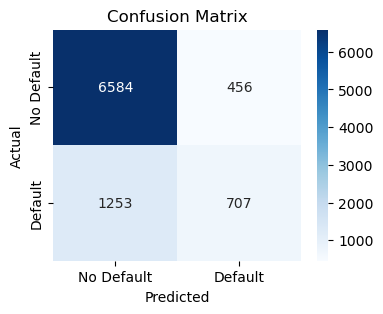

In [47]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
accuracy = (6584 + 707) / (6584 + 707 + 1253 + 456)
sensitivity = (707) / (707 + 1253)
specificity = (6584) / (6584 + 456)
precision = (707) / (707 + 456)
f1 = f1_score(y_test, y_pred_xgb)

In [49]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8101
Sensitivity: 0.3607
Specificity: 0.9352
Precision: 0.6079
F1 Score: 0.4528


Let's think about these results for a moment.  Notice that neither sensitivity nor precision are fantastic, though one (precision) is a lot better than the other.  That is not uncommon with problems like this where we have an imbalanced class; we will address methods for addressing this in the next section.  However, specificity and accuracy are quite strong.  We pause for a moment to think about what we really want to optimize with this particular problem.  Both of these arguments are quite strong:

1) The client needs to cancel credit cards and services for customers that are likely to default next month; therefore if a customer is flagged as such we need to be very confident that they will truly default
2) The client needs to identify as many of the cases that will default as possible because these represent the greatest risk and loss of revenue to their business

One must make these determinations directly with their client for their particular problem.  We note also that there exist various functions available in `sklearn.metrics` for calculating these metrics.  We will show a few examples here:

In [50]:
(
    accuracy_score(y_test, y_pred_xgb),
    recall_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_xgb)
)

(0.8101111111111111, 0.3607142857142857, 0.6079105760963026)

Now, we pause again and think about this.  Note that we could have a perfect 100% sensitive model ALL the time if we wanted to.  It's easy - just ALWAYS predict the positive class, 100% of the time!  This way, you will correctly identify all the cases that default; but such a model cannot discriminate between positives and negatives, therefore it is useless.  However, this extreme situation helps us think about the tradeoff between sensitivity and both specificity and precision.  If we lower our threshold and make it easier to predict positives, we will have more false positives (e.g. lower precision) and we are less likely to correctly identify negatives.

It follows that it is extremely important to have a measure that balances for more than one of these metrics at a time.  An example of this is the F1 score, which will probably provide a more reasonable indication of the model's performance compared to something like accuracy.  We take this moment to introduce two new concepts: the Receiver Operating Characteristic Curve (ROC) and the Precision Recall (PR) curve, and the areas under them: the _AUROC_ and the _AUPRC_.

**AUROC**: Measures the model's ability to distinguish between classes, ranging from 0 to 1.

**AUPRC**: Measures the trade-off between Precision and Recall, also ranging from 0 to 1.  This is particularly useful for imbalanced datasets such as the one here.

Let's see both here!  To do this, we're going to need the 'probas' - these are the probabilities the classifier returns under the hood of the observation belonging to the positive class.

#### Evaluating the logistic regression model

In [51]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)

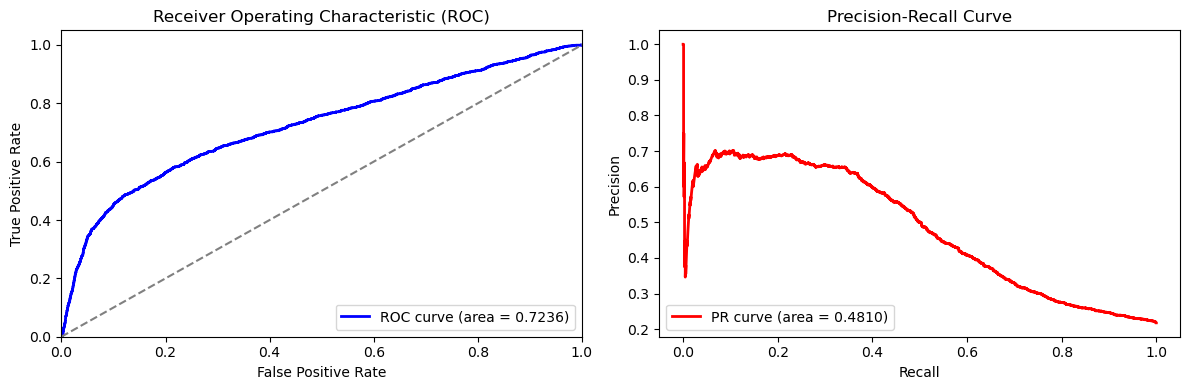

In [52]:
# plot ROC curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (area = {auprc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

#### Evaluating the xgboost model

In [53]:
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)

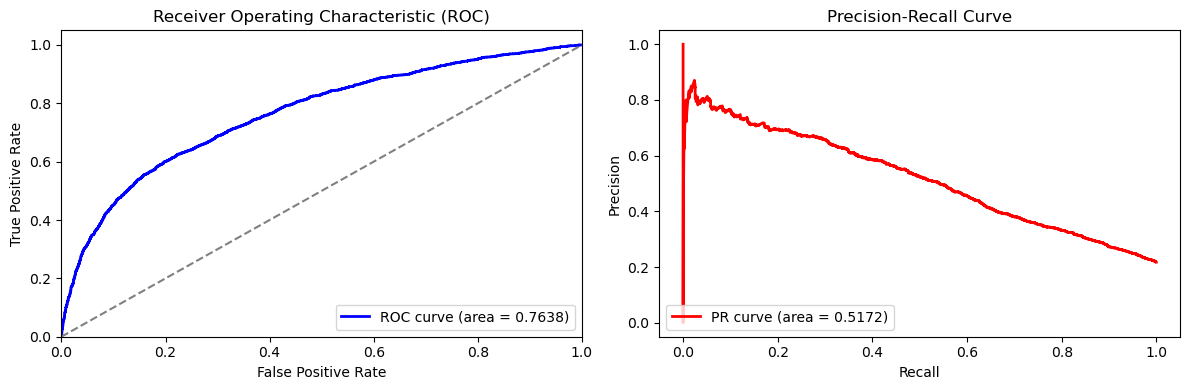

In [54]:
# plot ROC curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (area = {auprc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

Unsurprisingly, the area under the ROC curve is between sensitivity and specificity, and the area under the precision-recall curve is between the precision and the recall.  Of interest here is the fact that the AUROC is significantly higher than AU-PRC.  We emphasize again that when we have imbalanced data, AUROC can be misleadingly high and AUPRC is more informative.  This is because AUROC does not differentiate well between the majority and minority classes (again - just predict the majority class most of the time!).

We conclude this section by commenting, however, there is no universal yardstick by which one can say a model is good or bad.  In the case of AUROC, an area equal to 0.5 is said to be equivalent to random guessing.  Similarly, in the case of AU-PRC, a classifier equivalent to random guessing is equal to the prevalence of the positive class.  In both cases, a perfect classifier is equal to 1.  But in between, what's "good"?  It depends on the problem; however, these do provide us a useful framework for comparing models to each other!

## Model Tuning

In [55]:
#pip install scikit-learn==1.2.2

In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**Learning Objectives:** Gain an intuition for the frameworks behind machine learning performance (in particular: the bias/variance tradeoff) and hyperparameter tuning (in particular: cross-validation).  Be able to perform and combine different techniques to improve the performance of a machine learning classifier, including down- or up- sampling, and hyperparameter tuning via grid search or random search.

**Requirements:** Python (in Jupyter or a text editor), minimal Python coding experience preferably with exposure to Scikit-Learn.

**Prior recommended training**: Introductory programming, statistics, and machine learning.

**Skills and levels**: Beginner to intermediate data scientists, engineers, statisticians, and general ML practitioners.

In this section we will explore a number of approaches for improving the performance of a classifier, after you have initially training it and evaluated its performance.  The first will be via upsampling & downsampling, popular approaches to the imbalanced class problem we keep mentioning.  We will introduce the concept of cross-validation, and then we will introduce hyperparameter tuning.  Note that our classifiers so far have been used completely out of the box thus far, with no real mind paid to these classifiers' individual "tunings".  We'll conclude by comparing two approaches for this: grid search, and random search.

#### Upsampling / Downsampling

We have spent some time describing how one of the biggest challenges with this dataset is the imbalanced nature of the response variable.  It is very rare in the real world to find datasets where classes have perfect 50-50 balances.  In fact, many real world financial datasets where we predict the outcome of users not paying back loans or defaulting can see outcomes happen less than 1% of the time!  Necessarily, this makes it incredibly difficult for the model to learn true differences between the majority and minority class.  Two methods we have for addressing this issue are _upsampling_ (also known as over-sampling) where we increase the number of instances in the minority class, and _downsampling_ (also known as under-sampling), where we decrease the number of instances in the majority class.

There are two primary ways we can _upsample_:

**Random upsampling**: Randomly duplicate examples from the minority class until we reach the desired balance with the majority class. 

**Synthetic data generation**: Create synthetic examples by interpolating between existing examples.  This can help reduce overfitting, as we are no longer replicating existing sample.

There are two primary ways we can _downsample_:

**Random downsampling**: Randomly remove examples from the majority class.

**Informed downsampling**: Use clustering or other algorithms to select which majority class instances to remove.

In general, downsampling is considered to be somewhat riskier compared to upsampling, because we risk losing important information by removing examples from the majority class.  However, we recall the bias-variance tradeoff and note that with upsampling we risk overfitting and with downsampling we risk underfitting.   We will illustrate random downsampling, and upsampling with a synthetic data generation called SMOTE (Synthetic Minority Over-sampling).

In [57]:
# use SMOTE to resample
smote = SMOTE(random_state=42)
X_res_over, y_res_over = smote.fit_resample(X_train, y_train)

# downsample
rus = RandomUnderSampler(random_state=37)
X_res_under, y_res_under = rus.fit_resample(X_train, y_train)

In [58]:
# train models on resampled data
xgb_model_up = XGBClassifier(eval_metric='logloss',
                             use_label_encoder=False,
                             random_state=42,
                             enable_categorical=True,)
xgb_model_up.fit(X_res_over, y_res_over)

xgb_model_down = XGBClassifier(eval_metric='logloss',
                               use_label_encoder=False,
                               random_state=37,
                               enable_categorical=True,)
xgb_model_down.fit(X_res_under, y_res_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=37, ...)

In [59]:
# compute the predicted values
y_pred_up = xgb_model_up.predict(X_test)
y_pred_down = xgb_model_down.predict(X_test)

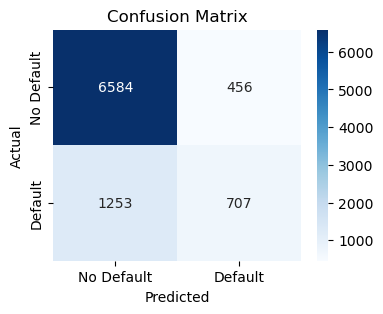

In [60]:
# remind ourselves - what was our original confusion matrix like?
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

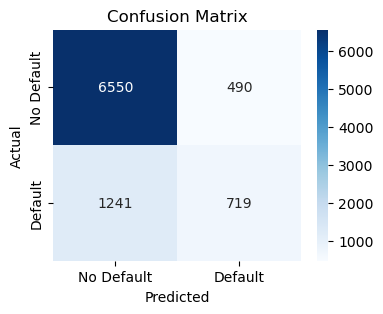

In [61]:
# upsampling performance
conf_matrix_up = confusion_matrix(y_test, y_pred_up)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_up, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

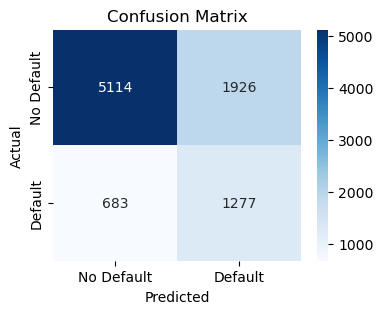

In [62]:
# downsampling performance
conf_matrix_down = confusion_matrix(y_test, y_pred_down)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_down, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Cross Validation

Cross validation is a critically important framework that we have yet to discuss.  Essentially, this estimates the ability of a machine learning or statistical model to perform on unseen data.  This will be applied under the hood in some of the next few examples, but it is important for participants to understand what is going on.  Essentially, we partition the training dataset into multiple subsets, training the model on some of those subsets, and validating/testing it on the remaining subsets.  The objective of this approach is to provide reliable performance estimation, aid in model selection, ensure that the model generalizes well, and provide a foundation for hyperparameter tuning - we obtain certainty that the hyperparameters yield good performance across various data subsets.

The most common cross-validation technique is known as _k-fold cross-validation_.   Here, we divide the data into _k_ equal-sized folds, train the model on _k-1_ folds, and validate on the remaining folds.  We repeat this process _k_ times, and the final performance metric is the average of the scores across all folds.  A popular extension of this approach is known as _stratified k-fold cross-validation_, where we ensure each fold has a representative proportion of classes.  With enough time and computing power we can only perform _leave-one-out cross-validation_, or _LOOCV_, where training sets are created by leaving out just one data point, so the number of folds are equal to the total number of instances we have in the data.

#### Grid Search

Grid search is a hyperparameter tuning method, where we manually specify a set of hyperparameter values to be evaluated.  The model will search through all combinations of hyperparameter tunings, and via cross validation find the best performing model, based on a pre-specified metric.  We will try it here on a base XGBoost classifier and see if we can improve its performance using grid search.

Note that this requires a little bit of prior knowledge about the underlying machine learning technique and normal ranges for the hyperparameters.  While this is not a theoretical machine learning project or a deep-dive into XGBoost necessarily, we highly recommend participants read the documentation for classifiers applied for predictive purposes.

In [63]:
# define the model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    enable_categorical=True,
)

# define the parameter grid
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=N...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [10, 50],
                         'subsample': [0.8, 0.9]},
             scoring='recall')

In [64]:
# use the best estimator
best_xgb_model = grid_search.best_estimator_

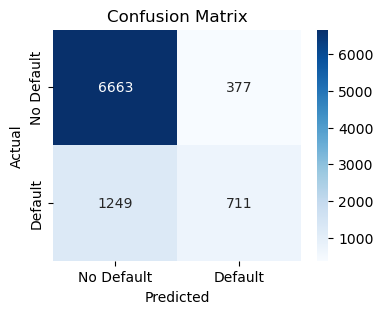

In [65]:
# compute the predicted values
y_pred_ht = best_xgb_model.predict(X_test)

# evaluate model
conf_matrix_xgb = confusion_matrix(y_test, y_pred_ht)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Random Search

In contrast with grid search, with random search we randomly sample from a distribution of possible hyperparameter values.   We define a range for hyperparameters, randomly sample a fixed number of combinations from these ranges, train and evaluate the model for each sampled combination, and lastly select the combination that gives the best performance based on the provided metric.  Random search should generally be faster and more efficient than grid search, however, because it only samples a subset of all possible combinations, there is no guarantee that the optimal combination of hyperparameters can be found.  Let's see how it performs here!

In [66]:
# define the model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    enable_categorical=True,
)

# define the parameter distribution
param_dist = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.001, 0.01, 0.05],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# perform grid search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='recall',
    random_state=42
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'learning_rate': [0.001, 0.01, 0.05],
                                        'max_depth': [5, 7, 9],
                                        'n_estimators': [10, 50, 100],
                                        'subsample': [0.8, 0.9]},
                   random_state=42, scoring='recall')

In [67]:
# return best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.9}


In [68]:
# use the best estimator
best_xgb_model = random_search.best_estimator_

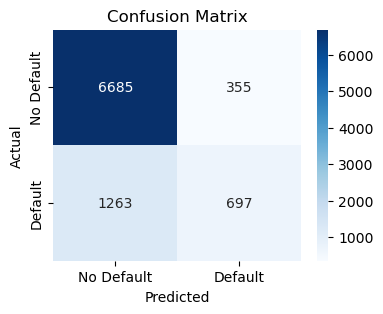

In [69]:
# compute the predicted values
y_pred_ht = best_xgb_model.predict(X_test)

# evaluate model
conf_matrix_xgb = confusion_matrix(y_test, y_pred_ht)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Putting it all together

To conclude this section, notice that everything we have covered thus far has been treated somewhat independently, rather than connected to one another.  Let's try a few of these concepts together and see how our model performs.   We are going to apply the SMOTE with hyperparameter with the randomized search approach, and see how we do.

In [70]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# define the model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    enable_categorical=True,
)

# define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# perform randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='average_precision',
    random_state=42
)

# fit the model
random_search.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9]},
                   random_state=42, scoring='average_precision')

In [71]:
# print evaluation metrics
print("Best Parameters from Random Search:", random_search.best_params_)

Best Parameters from Random Search: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [72]:
# use the best estimator
best_xgb_model = random_search.best_estimator_

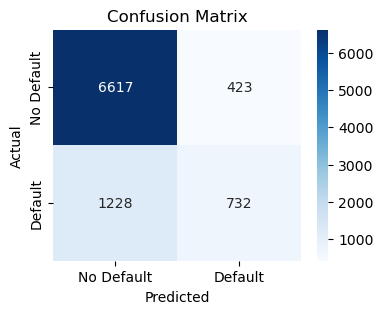

In [73]:
# compute the predicted values
y_pred_ht = best_xgb_model.predict(X_test)

# evaluate model
conf_matrix_xgb = confusion_matrix(y_test, y_pred_ht)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Some concluding thoughts here are that by far our greatest improvement in the performance of the model was due to the feature engineering.  Hyperparameter tuning is an important step, but it is very unlikely and rare for this additional step to transform a model from subpar to great, or vice versa.  As the final piece to illustrate this, let's see how our ROC-AUC and PR-AUC compare.  There hasn't really been much change!  Much of this can be owed to the quality of the XGBoost classifier out of the box on a dataset that is well set up.

In [74]:
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)

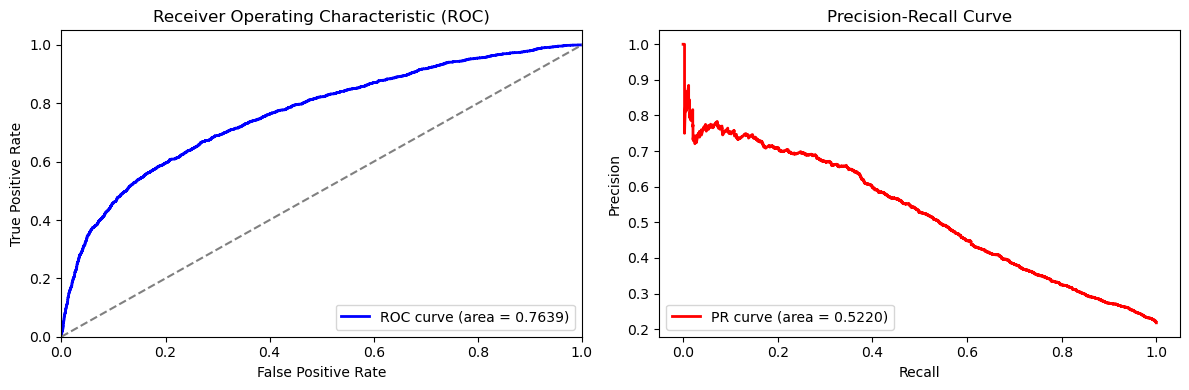

In [75]:
# plot ROC curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (area = {auprc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

## Model Deployment

In [ ]:
#pip install Flask

from flask import Flask, request, jsonify
import joblib
import json
import requests

**Learning Objectives:** Develop some foundational understanding of what a REST API is along with the means and challenges associated with deploying machine learning models into production.  Be able to replicate a similar procedure as what is seen here, including developing and installation of an application and establishing the application's requirements in a necessary file structure.  Participants should also develop some intuition for how to test and debug said applications so that first steps to deploying them to a platform like a cloud services provider can more easily follow.

**Requirements:** Python with a configured development environment, moderate Python coding experience preferably with experience to Flask.  Participants will need to use the command prompt and curl.

**Prior recommended training**: Programming, statistics, and machine learning.  Command line training would also be useful.

**Skills and levels**: Data scientists, engineers, statisticians, and general ML practitioners of all levels.

In this last piece of the course, we will be switching to an app that is set up in our working directory.  However, the code snippets will be illustrated and commented on in this notebook as well so that participants receive full context.  We have emphasized numerous times at this point that it is often not enough to simply create a proof of concept or develop a prototype in a notebook or a Python script that is not accessible to an end user.  The model often must be deployed into some sort of production setting. 

There are numerous ways that this can be done.  One example, actually, is using a framework like Shiny or Streamlit.  Cloud platforms like GCP, Azure, or AWS are options as well.  In this course, we will demonstrate an example by using Flask.  Before we launch into this content, it is helpful to have a few definitions down.

**REST (Representational State Transfer) API**: A web service that enables communication between a client and a server over the HTTP protocol, allowing clients to interact with resources.  This is a flexible and conceptual framework that is not tied to any specific implementation.  Resources can be represented many different ways, but the most common format is JSON.  These use standard HTTP methods to perform actions on resources:

    - DELETE: Removes a resource
    - GET: Retrieves data from the server
    - POST: Creates a new resource
    - PUT: Updates a resource
    
**Flask**: A web framework for Python that allows developers to build web applications, including REST APIs and web services

**Pickling**: This is a process used to serialize and deserialize projects, where to _serialize_ means to convert an object into a byte stream that can be saved to a file or transmitted over a network.  The object we serialize is the model in our case here.

**curl**: A command-line tool for transferring data via URL, which supports protocols such as HTTP and HTTPS.  Users can send and receive data to and from servers using different protocols.  We will use it to test our API here.

In [ ]:
# we need to begin by saving our model
# can use either joblib or pickle
joblib.dump(best_xgb_model, 'model.pkl')

In [ ]:
# illustrate loading this model
model = joblib.load('model.pkl')

In [ ]:
# create the base Flask app
app = Flask(__name__)

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    # get data from a POST request
    data = request.json
    
    # convert the data into a np array
    features = pd.DataFrame(data['features']).T
    
    # make predictions
    prediction = model.predict(features)
    
    # return the prediction as a JSON response
    return jsonify({'prediction': int(prediction[0])})

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)

There is a lot to unpack here!  This did NOT work - however, we will run a variant of this in Visual Studio Code that WILL work, don't worry.  Note that this Flask app exited with SystemExit status 1.  Conceptually, this is because the notebook environment is not designed to handle Flask's runtime without interference.

In our local directory, we have saved the model into a serialized pickle file.  We can now access it from outside this Python kernel.  We then initialized a very similar (incomplete) Flask app.  Notice the `@app.route()` decorator atop the `predict()` function.  This was used to define a URL endpoint for the Flask app, specifying that function should be executed for incoming requests to that endpoint.  We had not yet served data to the app, but were just laying a foundation before the application failed.  The idea was that we would generate a `prediction` using the `predict` method of the `model`, and return this prediction in a JSON format.

We now have to take leave of the notebook and illustrate the full app in the command terminal.  There, we will have a JSON file, where the values represent imaginary values for an observation.  Given these values, we will see if we can make the app predict a response.

Creating a JSON is easy.  We illustrate:

In [ ]:
data = {
    "features": [
        240000, 40, 0, 0, 0, 0, 0, 0, 3430, 2478, 2299, 4800, 9810, 660, 2548, 2321, 4800, 9810, 660,
        2980, 1, 0, 1, 0, 0, 0, 0, 0, 1
    ]
}

with open('data.json', 'w') as json_file:
    json.dump(data, json_file)

Recall what our data roughly looked like.  It is critical that our data are the same size.

In [ ]:
X_train.head(2)

When we look at our completed application, we will pass this new data to it to return a prediction.  To do so, we need to use curl.  This data were stored in a JSON called `data.json`, which we will send to curl via a POST request.  The app will listen at the local URL http://127.0.0.1:5000.

`curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d @data.json`

Congratulations!   We have built an application that can serve model predictions via an API endpoint.  To reiterate some points from earlier, we would need to add a user interface to this process, using a framework like React or HTML/CSS.  A web framework like Shiny or Streamlit would also be possible in conjunction.  This application could make HTTP requests through various means.  This is not a course in web development necessarily, but the participant now has a solid foundation to understand how model predictions can be served.

## Model Monitoring

In [ ]:
import numpy as np
import random
import shap

**Learning Objectives:** Understand key terms and concepts that are common following the deployment of models to production, when the models begin exposure to live production data that is different from what they were trained on.  Participants will know the difference between skew, data drift, and concept data, and gain some intuition for when and how often models in production should be retrained.

**Requirements:** Python (in Jupyter or a text editor), minimal Python coding experience preferably with exposure to Scikit-Learn.

**Prior recommended training**: Programming, statistics, and machine learning.  Exposure to a major cloud platform (AWS, Azure, or GCP) will be helpful too.

**Skills and levels**: Data scientists, engineers, statisticians, and general ML practitioners of all levels.

We take this opportunity to congratulate the participant on making it to this final stage of the project, where we conclude with a discussion around model monitoring.  This is a step that novices tend to not think about, but is critical for the sustainment and long-term provision of value to business end users.  In this final section, we invite the participant to imagine they have completed the deployment of an application similar to one we saw in the previous one (just pretend we have a nice looking front end as well!)  We will generate some new, artificial looking data.  However, this data will simulate scenarios that could occur in the real world, as new live data begins to differentiate itself from the data that was used to train and validate the model.  We will see what would happen if we just simply ignored these differences.  But first, we will begin by understanding some definitions.

**Skew**: When there is a difference in the input feature distribution in prodution, compared to the training data, for one or more features.  Example: we saw instances of LIMIT_BAL = 1,000,000 at the most when we performed data exploration.  What if we saw data in production where LIMIT_BAL = 4,000,000?

**Data drift**: When an input's statistical distribution changes in production over time.  This is a similar concept to skew, though perhaps more specific.  For example, what if we saw over time that the distributions of the BILL_AMT variables changed, and that they took on higher numbers when the model was in production later, because user behavior changed and they started going for longer periods without making payments?

**Concept drift**: When changes in the underlying relationship between the input features and the target change over time.  Example: suppose the relationship between age and whether the user was going to default next month changed, to where years later, younger users started defaulting at higher numbers due to macroeconomic conditions.

We note this is a little facetious because the data itself does reference specific months (April - September), but we can use our imagination here somewhat.

#### Synthetic data

We will generate some data in the style of our training and testing data but with some significant differences.  Pretend this is our live data that the model sees "in production". 

In [ ]:
# set seed for reproducibility
np.random.seed(42)
random.seed(42)

n_samples = 2000

In [ ]:
# let's just start by basing this synthetic data off similar looking testing data
# changes will follow
synthetic_data = X_test[0:n_samples]

In [ ]:
# introduce skew for the LIMIT_BAL and response features
# they both have totally new distributions
synthetic_data.loc[:, 'LIMIT_BAL'] = np.random.exponential(300000, n_samples)
synthetic_data.loc[:, 'default.payment.next.month'] = y_test[0:n_samples]

In [ ]:
# introduce data drift
synthetic_data.loc[:, 'BILL_AMT1'] += np.random.normal(7000, 1500, n_samples)

In [ ]:
# introduce concept drift for the AGE feature
synthetic_data.loc[synthetic_data['AGE'] < 24, 'default.payment.next.month'] = 1

In [ ]:
# isolate features and response
X_synthetic = synthetic_data.drop(columns=['default.payment.next.month'])
y_synthetic = synthetic_data['default.payment.next.month']

Wow!  What a doozy.  We have coerced skew by changing the distribution of `LIMIT_BAL` completely, effectively changed the relationship of the target with `AGE` (and in the process shifted its distribution and possibly its relations with other features as well), and generated drift in the `BILL_AMT1` feature.  Maybe the next question you are asking is... how will our model perform?  Well, let's see.

In [ ]:
# compute the predicted values
y_pred_synthetic = best_xgb_model.predict(X_synthetic)

# evaluate model
conf_matrix_synthetic = confusion_matrix(y_synthetic, y_pred_synthetic)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_synthetic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Notice the performance has changed fairly significantly.  The specificity is quite reasonable, but the precision has decreased significantly.  This is a totally realistic change that can occur, and if we are not paying attention to some of the details behind the data such as the distributions fo features, these sorts of issues can really creep up.  It is a reasonable idea that one inspects the production data and compares the distributions to data used during training, just to detect issues like skew and drift.  If these issues are detected, it is reasonable to come up with a new training dataset and retrain the model.  More broadly speaking, regular retraining of the model on some sort of schedule, such as once a month, is not a bad idea for model maintenance purposes.  Generally, there are computational limits and costs to constant model retraining, especially if we are working with millions or hundreds of millions of rows and/or the model retraining takes hours.  But on the flip side, too infrequent of model retraining increases the chance of drift/skew issues cropping up.

The last issue worthy of consideration, which we will conclude this project with, is model explainability.

#### Model explainability

Throughout this project, our focus has been on _prediction_, rather than _inference_.  We have wanted to build a reasonably accurate predictive model and explain how this could be put into production, so that given a new set of data we could assess how the model would perform in terms of predicting whether a user would default on payments next month.  However, in the context of model monitoring and detecting issues and changes in the data, paying attention to _inference_ and how various features contribute to the model's predictions can be extremely helpful.  We will illustrate this by looking at the _SHAP values_ for our model.

**SHAP values** are short for SHapley Additive exPlanations, and are a method used to explain the contribution of each to a particular prediction, by calculating the average impact of a feature on the model's output.  They are based on game theory and enable interpretability of the model's predictions.  In the context of model monitoring, we may check the SHAP values for the training data and then later on production data.  If we see that SHAP values look radically different, that is a massive hint that there is an issue of drift or skew occurring.  

With that, we will show an example of computing SHAP values for our model:

In [ ]:
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train, max_display=10)

Let's try to read this.  We see that red colors correspond to high values and blue colors correspond to low values for the actual feature.  Values on the left, with negative SHAP values, contribute to the model's prediction of 0.  For example, we see the MARRIAGE and SEX variables very high in feature importance (features ranked from most to least important), and seeing that 1 for MARRIAGE_Single tends to associate with model's prediction of 0 (not defaulting next month).  Similar interpretations can be made going down this list.  The important note here is that as we monitor the model, this is a very useful piece of information to monitor.  Questions we can ask are as follows: do we see the ranked importance of features changing radically on the production data compared to training data?  Are associations flipping - that is, in the past being single was "good" with respect to the target and now it is "bad"?  This is a useful way to quickly detect concept drift and maybe pinpoint issues such as data drift and skew.  And while this is not the focus of this project or section, this can be very interesting information to end users and business stakeholders as well.

With this discussion, we take our leave of the participant.

## Glossary

Index of terms introduced throughout this course.

#### Model Training:

**KNN**: Short for 'K-Nearest Neighbors', this is a simple and popular algorithm that classifies a data point based on the majority class among its 'k' nearest neighbors, where 'k' is a hyperparameter we pass upfront.

**Decision Trees**: These are structures where each internal node represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents a class label.

**Random Forests**: These correct for the overfitting and performance issues of decision trees by ensembling the results of multiple decision trees and combining their predictions to improve robustness and accuracy.  These train trees on random subsets of the data and features, and the trees are allowed to "vote" (this process is known as 'bagging').

**XGBoost**: Uses a different process, known as 'boosting'.  Trees are built in a sequential manner where each tree corrects the errors of the previous one, in particular adjusting its weights for the observations that were misclassified.

#### Model Evaluation:

**Accuracy**: The proportion of correctly classified instances out of the total instances.

**Sensitivity/Recall**: The proportion of true positives correctly identified out of total actual positives.

**Specificity**: The proportion of true negatives correctly identified out of total actual negatives.

**Precision**: The proportion of predicted positives that were actually true positives.

**F1 Score**: The harmonic mean of precision and recall.

**AUROC**: Measures the model's ability to distinguish between classes, ranging from 0 to 1.

**AUPRC**: Measures the trade-off between Precision and Recall, also ranging from 0 to 1.

#### Model Tuning:

**Upsampling**: (also known as over-sampling) where we increase the number of instances in the minority class.

**Downsampling**: (also known as under-sampling), where we decrease the number of instances in the majority class.

**Cross-validation**: Where we partition the training dataset into multiple subsets, training the model on some of those subsets, and validating/testing it on the remaining subsets.

**k-fold cross-validation**: We divide the data into _k_ equal-sized folds, train the model on _k-1_ folds, and validate on the remaining folds.  We repeat this process _k_ times, and the final performance metric is the average of the scores across all folds.
    - A popular extension of this approach is known as _stratified k-fold cross-validation_, where we ensure each fold has a representative proportion of classes.

**LOOCV**: Leave-one-out cross validation, where training sets are created by leaving out just one data point, so the number of folds are equal to the total number of instances we have in the data.

**Grid search**: A hyperparameter tuning method where we manually specify a set of hyperparameter values to be evaluated, search through all combinations of hyperparameter tunings, and via cross validation find the best performing model, based on a pre-specified metric.

**Random search**: Randomly sample from a distribution of possible hyperparameter values given a range for the hyperparameters, randomly sample a fixed number of combinations from these ranges, train and evaluate the model for each sampled combination, and lastly select the combination that gives the best performance based on the provided metric.


#### Model Deployment:

**REST (Representational State Transfer) API**: A web service that enables communication between a client and a server over the HTTP protocol, allowing clients to interact with resources.  This is a flexible and conceptual framework that is not tied to any specific implementation.  Resources can be represented many different ways, but the most common format is JSON.
    
**Flask**: A web framework for Python that allows developers to build web applications, including REST APIs and web services.

**Pickling**: This is a process used to serialize and deserialize projects, where to _serialize_ means to convert an object into a byte stream that can be saved to a file or transmitted over a network. 

**curl**: A command-line tool for transferring data via URL, which supports protocols such as HTTP and HTTPS.

#### Model Monitoring:

**Skew**: When there is a difference in the input feature distribution in prodution, compared to the training data, for one or more features.

**Data drift**: When an input's statistical distribution changes in production over time.  This is a similar concept to skew, though perhaps more specific.

**Concept drift**: When changes in the underlying relationship between the input features and the target change over time. 

**SHAP values**: short for SHapley Additive exPlanations, and are a method used to explain the contribution of each to a particular prediction, by calculating the average impact of a feature on the model's output. 